In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import sqlite3
%matplotlib inline
plt.style.use('ggplot')

#  Data Extraction

In [7]:
###Database Connection
Database = r"C:\Users\TaLaL\Desktop\SDAIA\Students.db"
Conn = sqlite3.connect(Database)
df = pd.read_sql_query("SELECT * from Exams" , con=Conn)
Conn.close()

In [8]:
df.columns = df.columns.str.replace('/', '_')
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Gender,Race_Ethnicity,Parental_level_of_education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score
0,male,group C,bachelor's degree,standard,completed,84.0,85.0,81.0
1,female,group D,associate's degree,standard,completed,76.0,82.0,85.0
2,female,group C,associate's degree,standard,completed,62.0,77.0,79.0
3,male,group B,high school,standard,none,72.0,64.0,59.0
4,female,group B,high school,standard,none,73.0,94.0,91.0


In [9]:
df.dtypes

Gender                          object
Race_Ethnicity                  object
Parental_level_of_education     object
Lunch                           object
Test_preparation_course         object
Math_score                     float64
Reading_score                  float64
Writing_score                  float64
dtype: object

In [10]:
df.describe()

,Math_score,Reading_score,Writing_score
count,10000.000000,10000.000000,10000.000000
mean,66.760500,69.750500,68.589300
std,15.260119,14.644866,15.304962
min,6.000000,14.000000,8.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


# Data Cleaning

In [11]:
##Check for missing values
df.isnull().sum()

Gender                         0
Race_Ethnicity                 1
Parental_level_of_education    1
Lunch                          1
Test_preparation_course        1
Math_score                     1
Reading_score                  1
Writing_score                  1
dtype: int64

In [12]:
###Remove missing values
df = df[df.Math_score.notnull()]

In [13]:
df.tail()

,Gender,Race_Ethnicity,Parental_level_of_education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score
9995,female,group D,some college,free/reduced,none,62.0,77.0,73.0
9996,female,group B,high school,standard,none,26.0,32.0,31.0
9997,female,group C,some high school,standard,completed,80.0,92.0,100.0
9998,female,group B,some high school,standard,none,52.0,60.0,55.0
9999,male,group B,bachelor's degree,standard,none,68.0,65.0,65.0


In [14]:
##Check and remove duplicates
df.duplicated().sum()
df.drop_duplicates(keep=False,inplace=True)

In [15]:
## There are the values high school and some high school those are same so we change some high school to high school
df["Parental_level_of_education"]=df["Parental_level_of_education"].str.replace("some high school","high school")

# Data Visualization

C:\Users\TaLaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


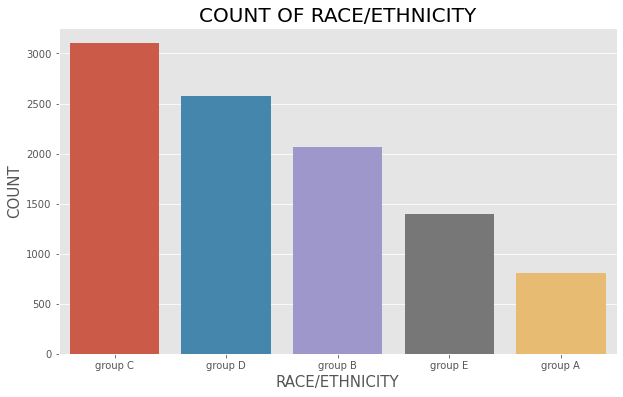

In [17]:
## Count of race/ethnicity
plt.figure(figsize=(10,6))
sns.countplot(df["Race_Ethnicity"])
plt.title("COUNT OF RACE/ETHNICITY",fontsize=20)
plt.xlabel("RACE/ETHNICITY",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.show()

C:\Users\TaLaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


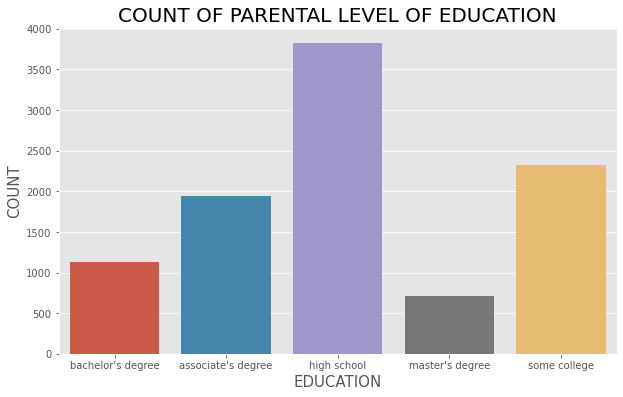

In [18]:
## Count of Parental level of education
plt.figure(figsize=(10,6))
sns.countplot(df["Parental_level_of_education"])
plt.title("COUNT OF PARENTAL LEVEL OF EDUCATION",fontsize=20)
plt.xlabel("EDUCATION",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.show()

### Set the pass score

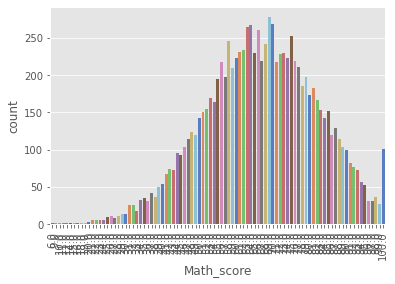

In [19]:
passmark = 40
p = sns.countplot(x="Math_score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90)

### Distribution of Math score

C:\Users\TaLaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


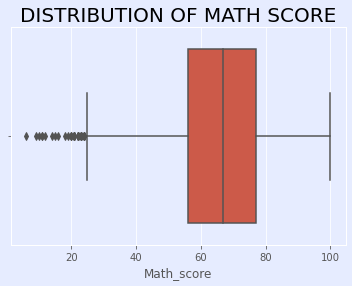

In [42]:
sns.boxplot(df["Math_score"])
plt.title("DISTRIBUTION OF MATH SCORE",fontsize=20)
plt.show()

### Students passed Math

In [43]:
df['Math_PassStatus'] = np.where(df['Math_score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    9544
F     397
Name: Math_PassStatus, dtype: int64

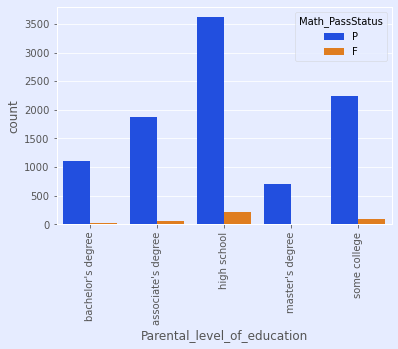

In [44]:
p = sns.countplot(x='Parental_level_of_education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

### Distribution of Reading score

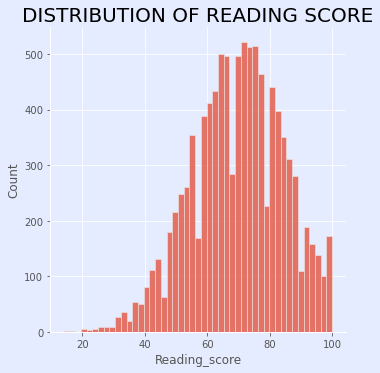

In [45]:
sns.displot(df["Reading_score"])
plt.title("DISTRIBUTION OF READING SCORE",fontsize=20)
plt.show()

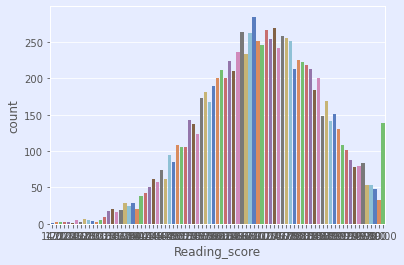

In [46]:
sns.countplot(x="Reading_score", data = df, palette="muted")
plt.show()

### Students passed Reading

In [47]:
df['Reading_PassStatus'] = np.where(df['Reading_score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    9715
F     226
Name: Reading_PassStatus, dtype: int64

### Distribution of Writing score

C:\Users\TaLaL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


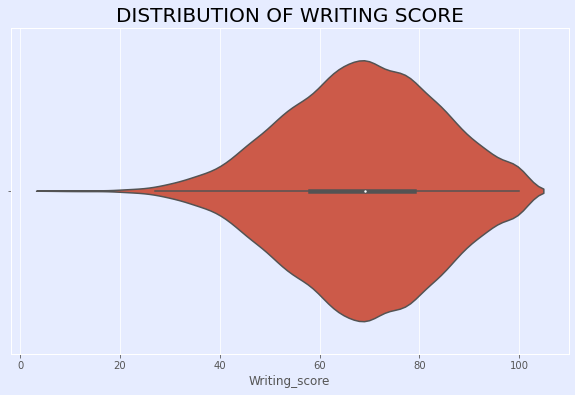

In [48]:
plt.figure(figsize=(10,6))
sns.violinplot(df["Writing_score"])
plt.title("DISTRIBUTION OF WRITING SCORE",fontsize=20)
plt.show()

### Students passed Writing

In [49]:
df['Writing_PassStatus'] = np.where(df['Writing_score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    9620
F     321
Name: Writing_PassStatus, dtype: int64

In [50]:
df.head()

,Gender,Race_Ethnicity,Parental_level_of_education,Lunch,Test_preparation_course,Math_score,Reading_score,Writing_score,Percentage,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Grade
0,male,group C,bachelor's degree,standard,completed,84.0,85.0,81.0,83.333333,P,P,P,P,A
1,female,group D,associate's degree,standard,completed,76.0,82.0,85.0,81.000000,P,P,P,P,A
2,female,group C,associate's degree,standard,completed,62.0,77.0,79.0,72.666667,P,P,P,P,B
3,male,group B,high school,standard,none,72.0,64.0,59.0,65.000000,P,P,P,P,C
4,female,group B,high school,standard,none,73.0,94.0,91.0,86.000000,P,P,P,P,A


# Findings
## Parental level of education effect on students

In [29]:
## Students passed in all subjects
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

In [30]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

C    2581
B    2410
A    2238
D    1645
F     559
E     508
Name: Grade, dtype: int64

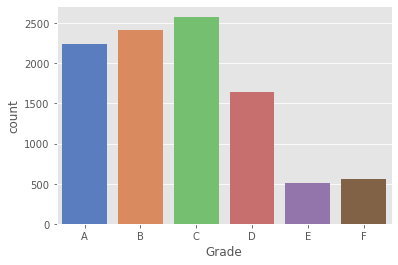

<Figure size 432x288 with 0 Axes>

In [31]:
## Grades plot
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()
plt.savefig("grades.png", dpi=250)

### Parent level of education influence on grades plot

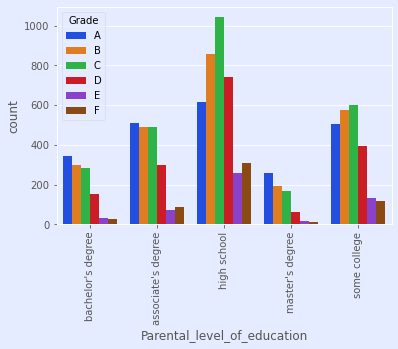

In [51]:
p = sns.countplot(x='Parental_level_of_education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.savefig("PLE.png", dpi=250)

## Gender relation with students score

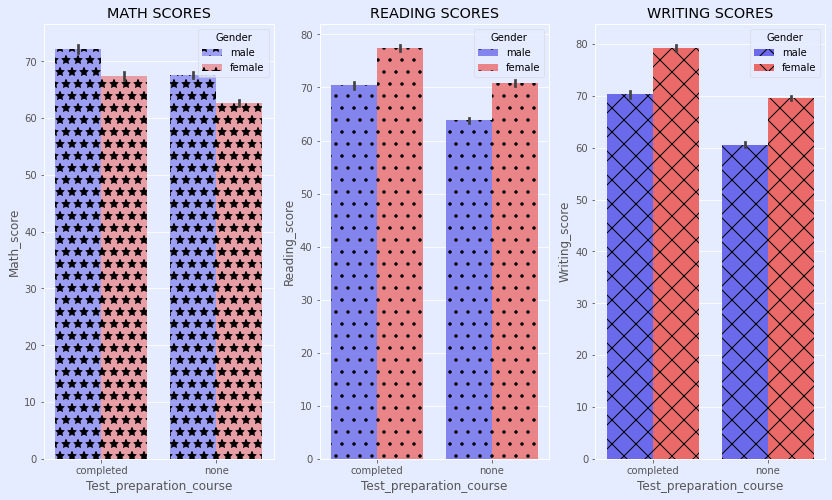

In [52]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='Test_preparation_course',y='Math_score',data=df,hue='Gender',palette='seismic',**{'hatch':'*','alpha':0.6,'linewidth':2})
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='Test_preparation_course',y='Reading_score',data=df,hue='Gender',palette='seismic',**{'hatch':'.','alpha':0.8,'linewidth':2})
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='Test_preparation_course',y='Writing_score',data=df,hue='Gender',palette='seismic',**{'hatch':'x','linewidth':2})
plt.title('WRITING SCORES')
plt.show()

## Effectiveness of Test Preparation

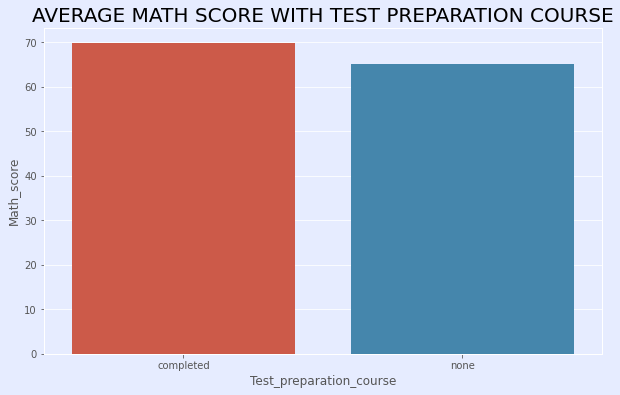

In [37]:
## Math
t=df.groupby(df["Test_preparation_course"])['Math_score'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=t["Test_preparation_course"],y=t["Math_score"])
plt.title("AVERAGE MATH SCORE WITH TEST PREPARATION COURSE",fontsize=20)
plt.show()


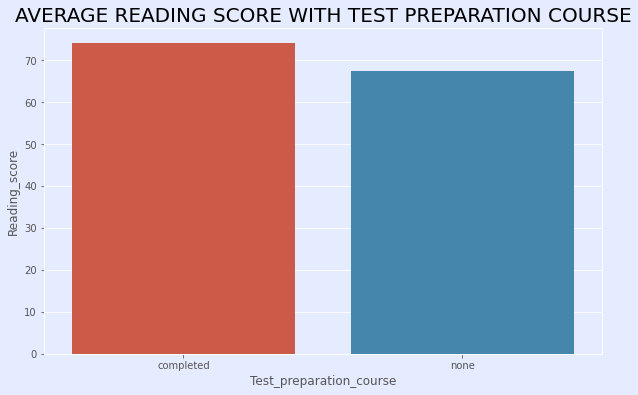

In [38]:
## Reading
t=df.groupby(df["Test_preparation_course"])['Reading_score'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=t["Test_preparation_course"],y=t["Reading_score"])
plt.title("AVERAGE READING SCORE WITH TEST PREPARATION COURSE",fontsize=20)
plt.show()

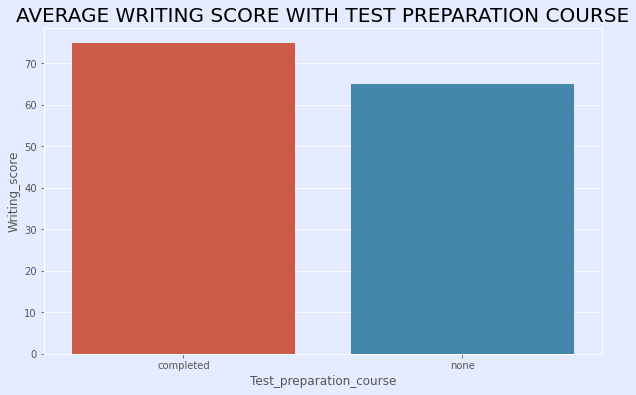

In [39]:
## Writing
t=df.groupby(df["Test_preparation_course"])['Writing_score'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=t["Test_preparation_course"],y=t["Writing_score"])
plt.title("AVERAGE WRITING SCORE WITH TEST PREPARATION COURSE",fontsize=20)
plt.show()